### 라이브러리

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina' ## 그림 더 선명하게

import warnings
warnings.filterwarnings("ignore")

### 데이터 로드

In [2]:
titanic=pd.read_csv('Titanic_clean_2.csv', index_col=0)
df=titanic.copy()

#### 기본

In [3]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Sex_male,Embarked_Q,Embarked_S
0,0,0,22.000000,1,0,7.2500,1,False,True,False,False,True,False,True
1,1,2,38.000000,1,0,71.2833,1,False,False,True,False,False,False,False
2,1,0,26.000000,0,0,7.9250,0,True,False,False,False,False,False,True
3,1,2,35.000000,1,0,53.1000,1,False,False,True,False,False,False,True
4,0,0,35.000000,0,0,8.0500,0,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.000000,0,0,13.0000,0,False,False,False,True,True,False,True
887,1,2,19.000000,0,0,30.0000,0,True,False,False,False,False,False,True
888,0,0,21.845638,1,2,23.4500,3,True,False,False,False,False,False,True
889,1,2,26.000000,0,0,30.0000,0,False,True,False,False,True,False,False


### K-means

#### 스케일링

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df2=df.copy()
df2.loc[:,:] = scaler.fit_transform(df)

In [35]:
df2

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Sex_male,Embarked_Q,Embarked_S
0,0,0.0,0.271174,0.125,0.000000,0.014151,0.1,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1,1.0,0.472229,0.125,0.000000,0.139136,0.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,0.0,0.321438,0.000,0.000000,0.015469,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1.0,0.434531,0.125,0.000000,0.103644,0.1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,0.0,0.434531,0.000,0.000000,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.5,0.334004,0.000,0.000000,0.025374,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
887,1,1.0,0.233476,0.000,0.000000,0.058556,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0,0.0,0.269234,0.125,0.333333,0.045771,0.3,1.0,0.0,0.0,0.0,0.0,0.0,1.0
889,1,1.0,0.321438,0.000,0.000000,0.058556,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


#### k-means 데이터 프레임

In [70]:
df_km=df2[['Age', 'Fare']]

#### Elbow method

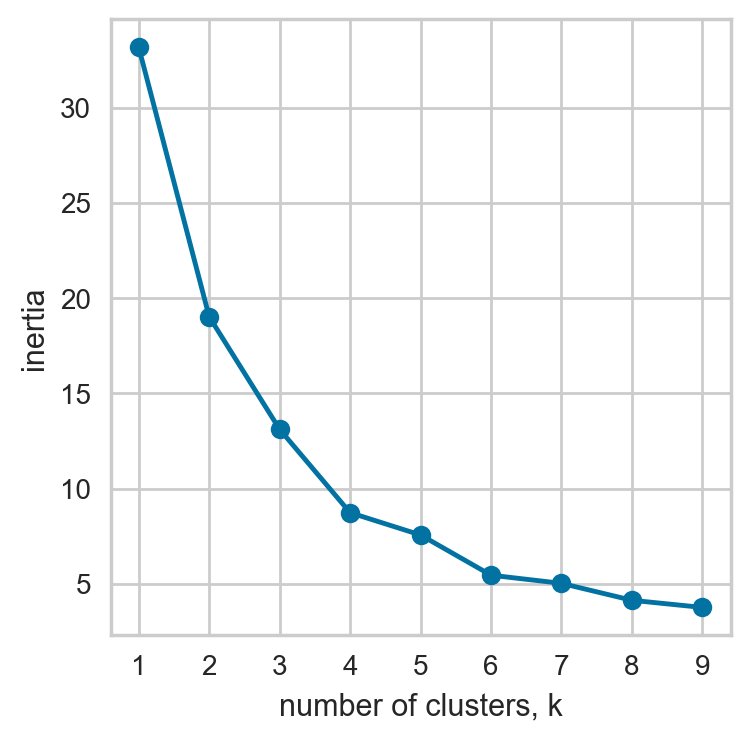

In [71]:
from sklearn.cluster import KMeans

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_km)
    inertias.append(model.inertia_)

plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=42),
                 k=(1, 10))

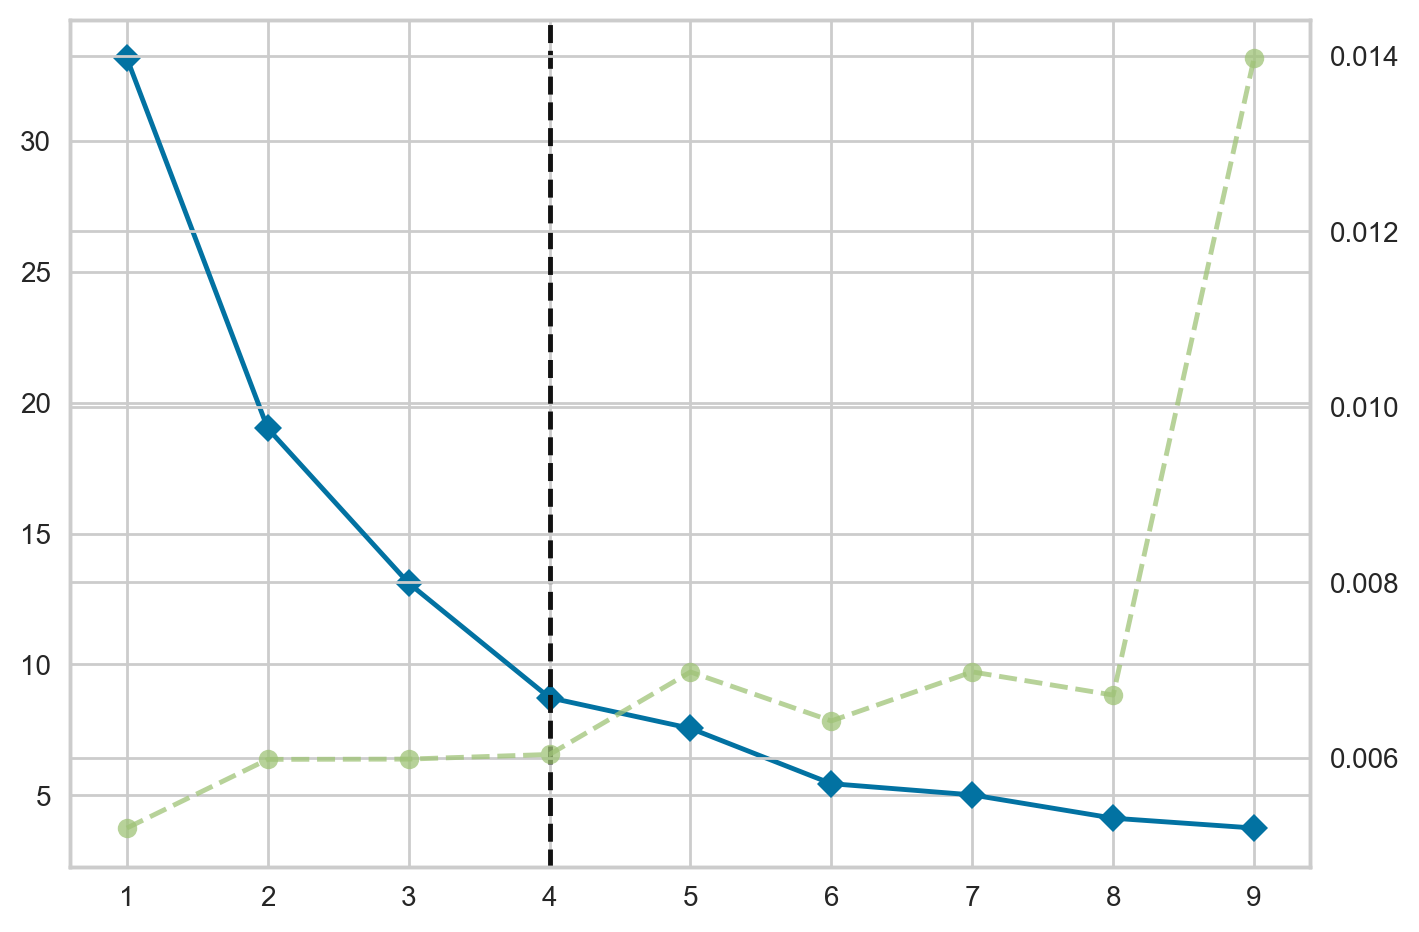

In [72]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df_km)

#### 모델링1

In [85]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_km)
df_kmv=df_km.copy()
df_kmv['cluster'] = kmeans.fit_predict(df_km)

#### 시각화1

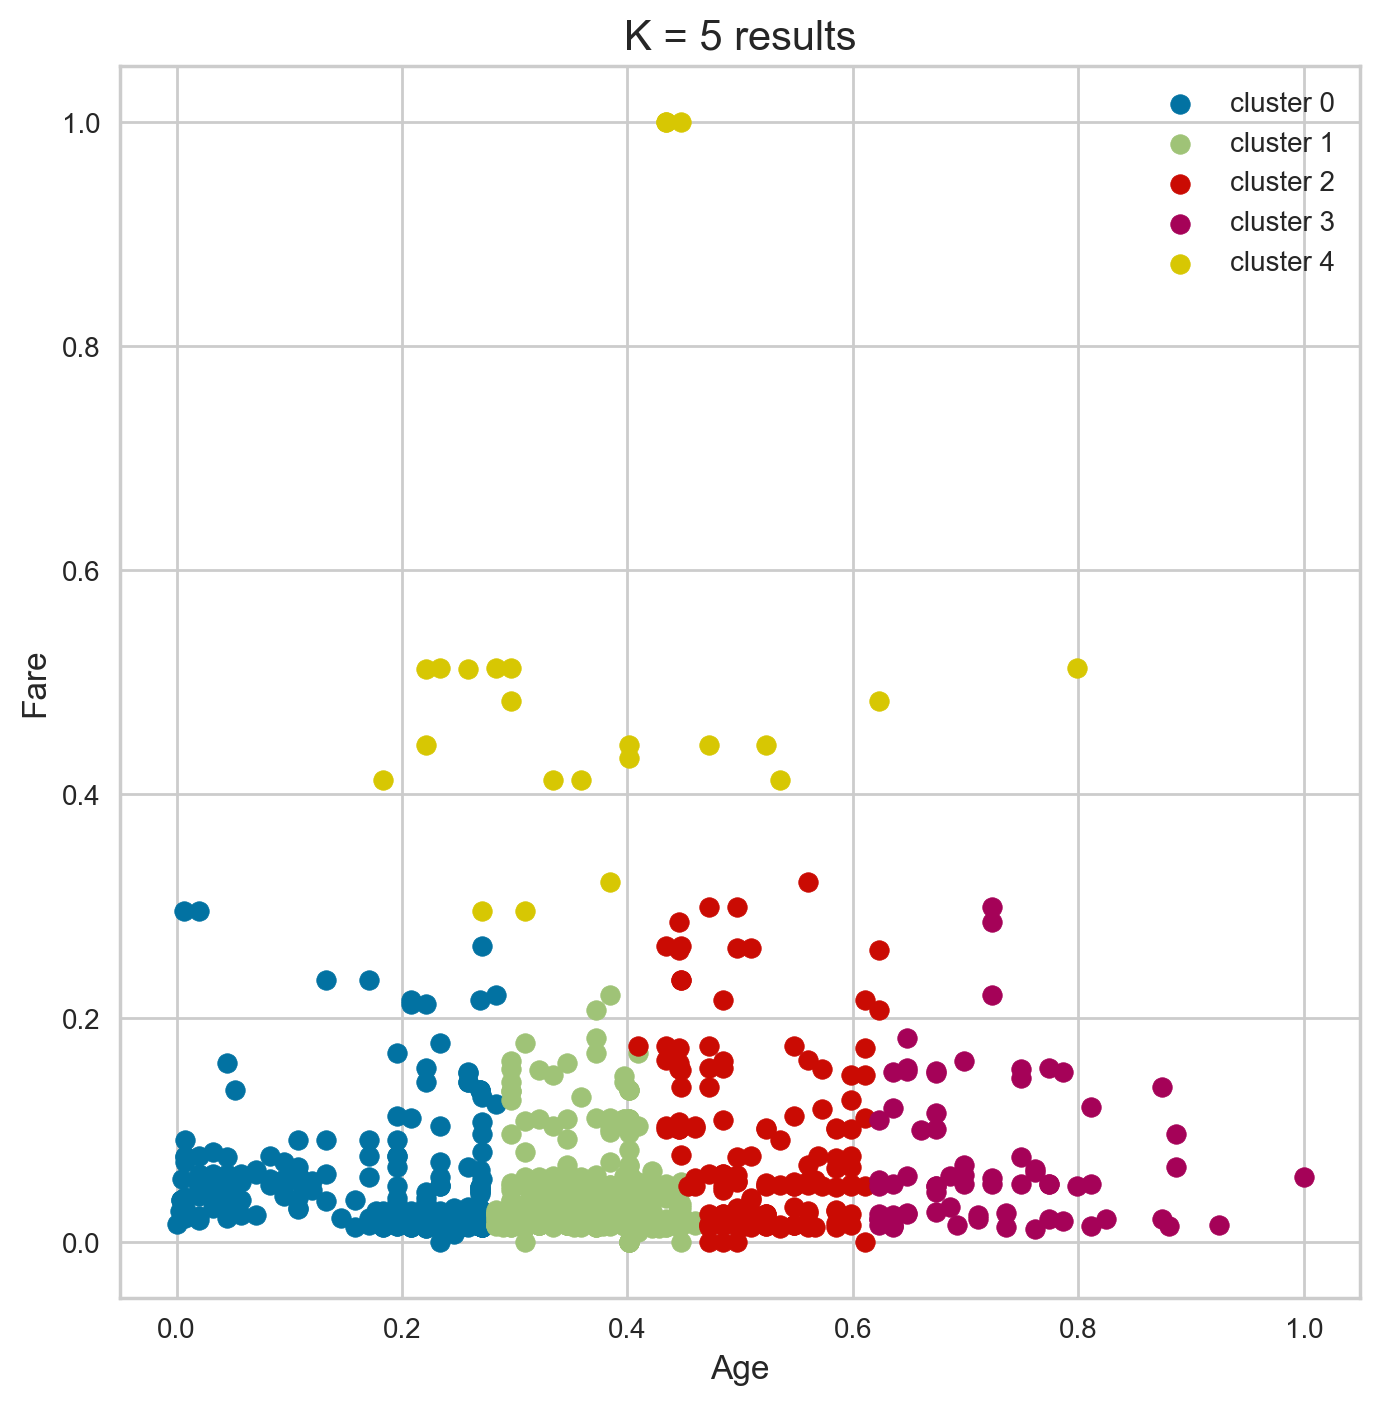

In [86]:
plt.figure(figsize = (8, 8))

k=5

for i in range(k):
    plt.scatter(df_kmv.loc[df_kmv['cluster'] == i, df_kmv.columns[0]], df_kmv.loc[df_kmv['cluster'] == i, df_kmv.columns[1]], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel(f'{df_kmv.columns[0]}', size = 12)
plt.ylabel(f'{df_kmv.columns[1]}', size = 12)
plt.show()

#### 모델링2

In [81]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_km)
df_kmv=df_km.copy()
df_kmv['cluster'] = kmeans.fit_predict(df_km)

#### 시각화2

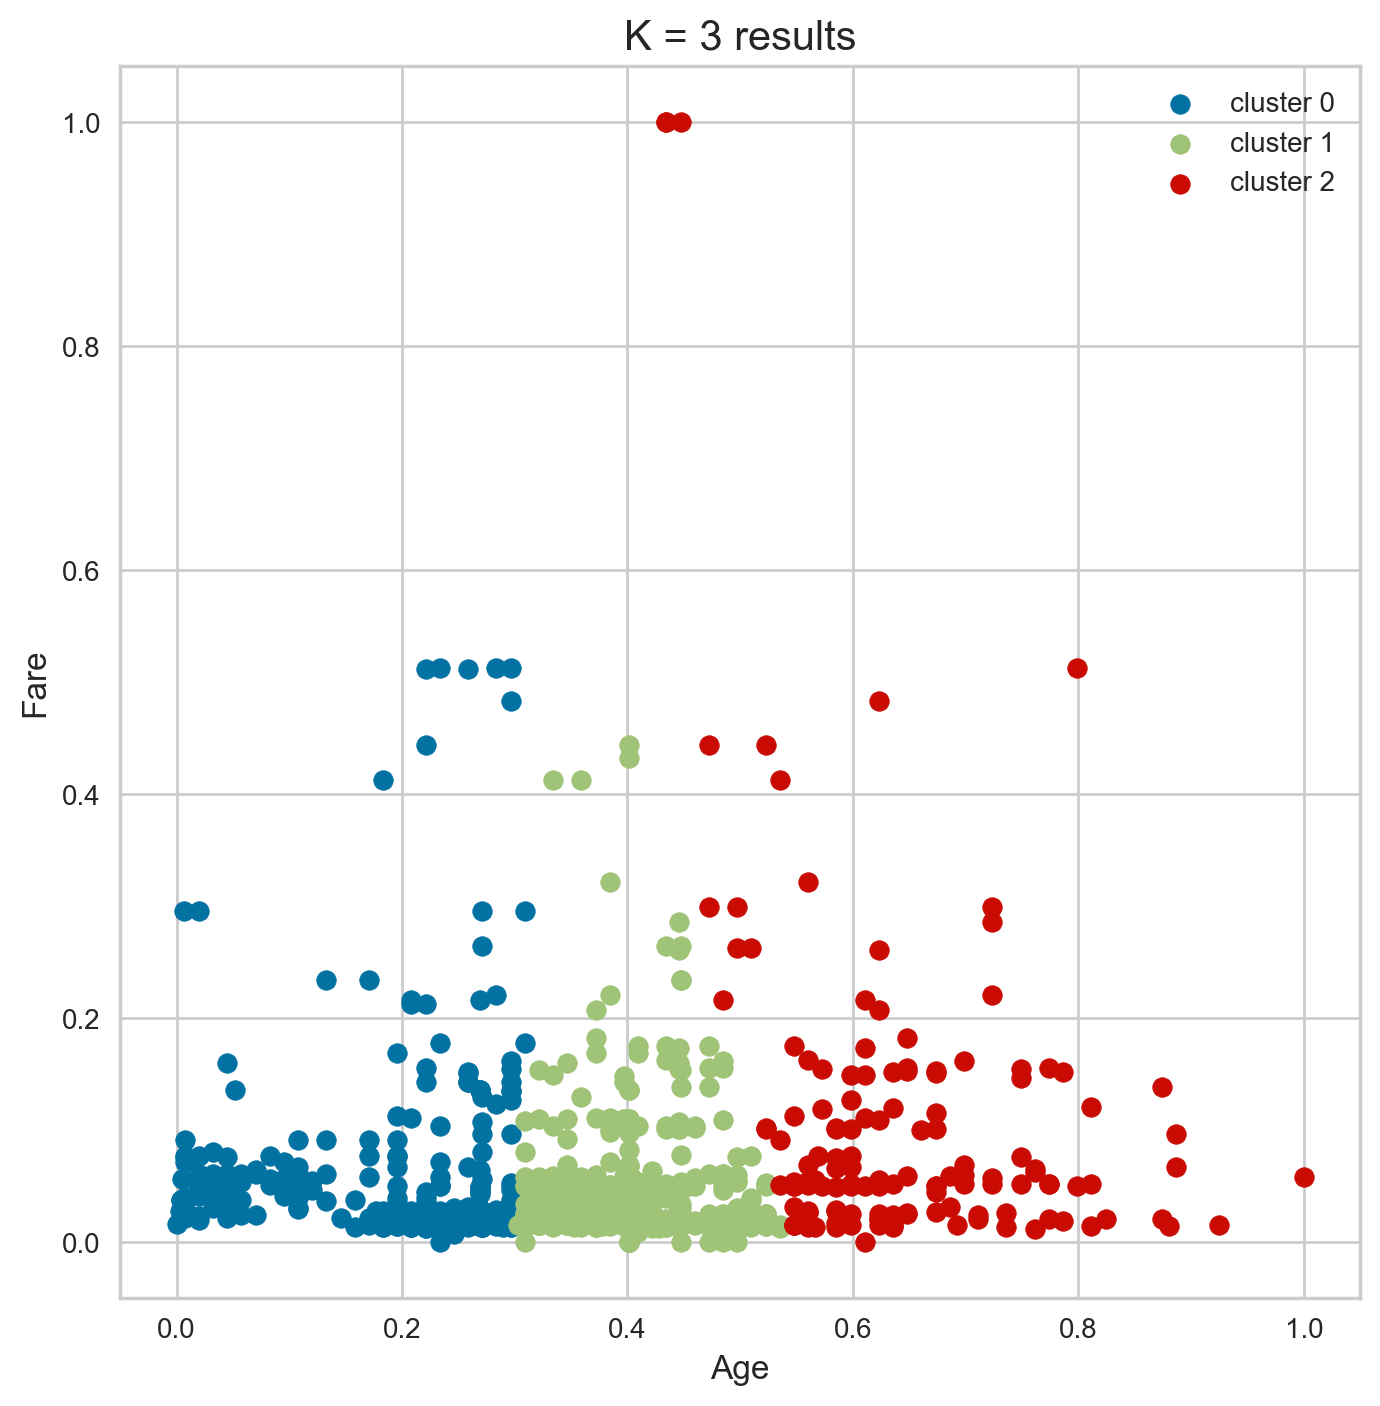

In [82]:
plt.figure(figsize = (8, 8))

k=3

for i in range(k):
    plt.scatter(df_kmv.loc[df_kmv['cluster'] == i, df_kmv.columns[0]], df_kmv.loc[df_kmv['cluster'] == i, df_kmv.columns[1]], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel(f'{df_kmv.columns[0]}', size = 12)
plt.ylabel(f'{df_kmv.columns[1]}', size = 12)
plt.show()

### PCA

#### scree plot

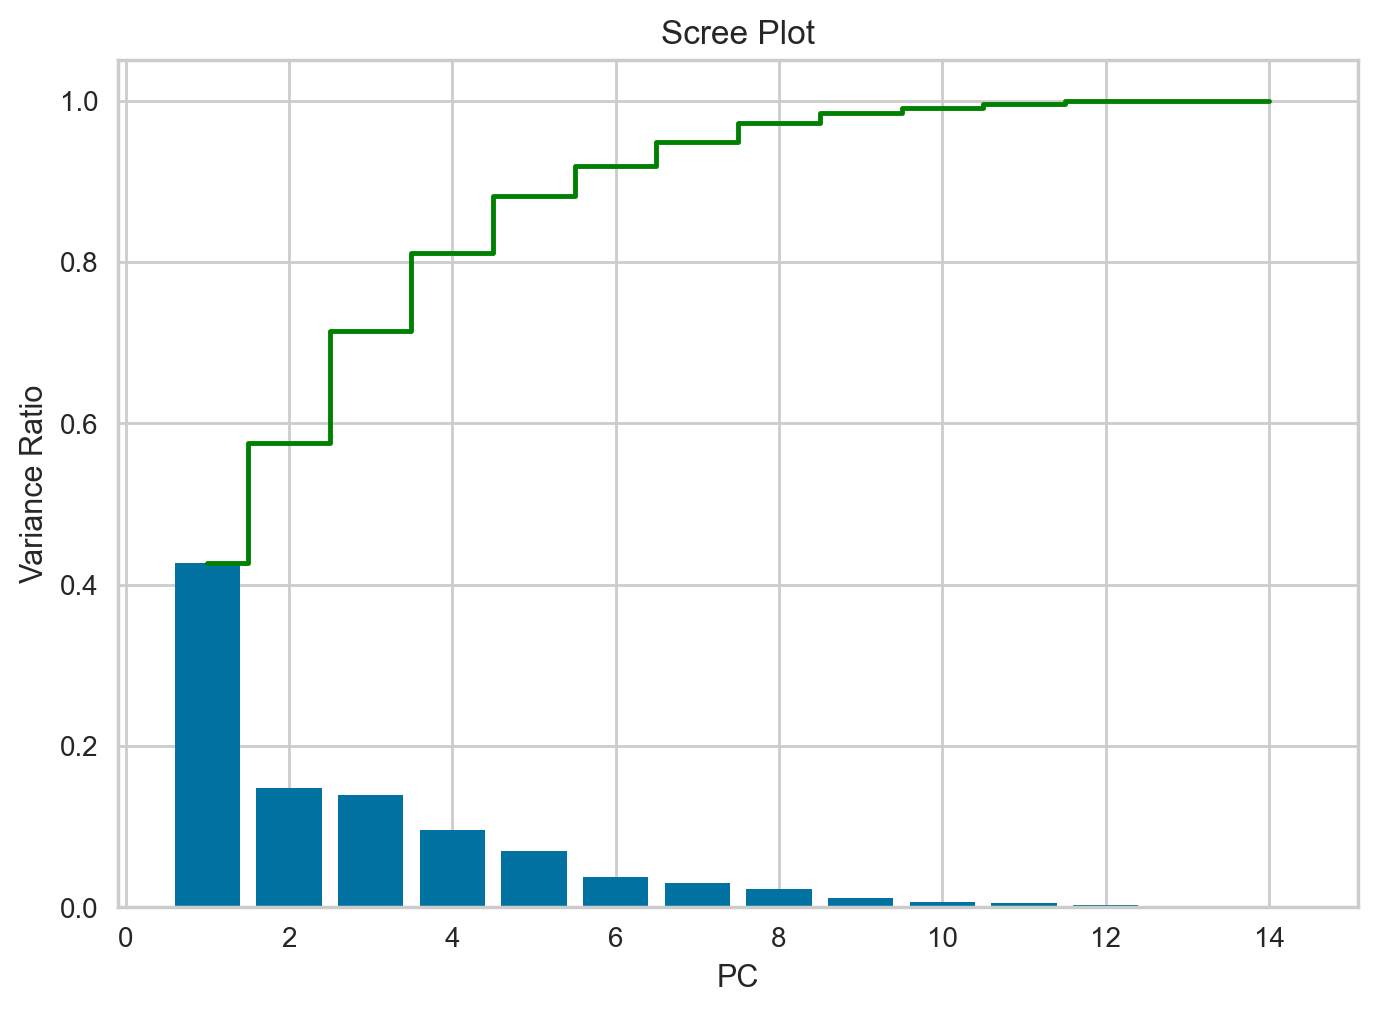

In [117]:
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(df2)

explained_variance = pca.explained_variance_ratio_

# Scree plot 그리기
x_axis = range(1, len(explained_variance)+1)
plt.bar(x_axis, explained_variance,
        align = 'center', label = 'Individual Explained Variance Ratio')
plt.step(x_axis, np.cumsum(explained_variance),
            where = 'mid', color='green', label='Cumulative Explained Variance Ratio')
plt.xlabel('PC')
plt.ylabel('Variance Ratio')
plt.title('Scree Plot')
plt.show()

#### PC 해석

In [133]:
pca = PCA(n_components=3)
pca.fit(df2)
pc = pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2', 'PC3'], index = df2.columns)
pc

,PC1,PC2,PC3
Survived,0.439738,-0.237897,0.324941
Pclass,0.133963,-0.455310,0.531118
Age,-0.032541,-0.103320,0.119575
SibSp,0.023156,0.006410,-0.075047
Parch,0.042623,-0.019477,-0.062288
Fare,0.031991,-0.041429,0.072391
FamilySize,0.044098,-0.006559,-0.097410
Title_Miss,0.333581,0.355027,-0.229752
Title_Mr,-0.557596,-0.016786,0.196045
Title_Mrs,0.211599,-0.311008,0.034108


In [134]:
pca = PCA(n_components=2)
pca.fit(df2)
pc = pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2'], index = df2.columns)
pc

,PC1,PC2
Survived,0.439738,-0.237897
Pclass,0.133963,-0.455310
Age,-0.032541,-0.103320
SibSp,0.023156,0.006410
Parch,0.042623,-0.019477
Fare,0.031991,-0.041429
FamilySize,0.044098,-0.006559
Title_Miss,0.333581,0.355027
Title_Mr,-0.557596,-0.016786
Title_Mrs,0.211599,-0.311008


#### 모델링

In [137]:
pca=PCA(n_components=2)
df_pca=pd.DataFrame(pca.fit_transform(df2), columns=['PC1', 'PC2'])
df_pca

,PC1,PC2
0,-0.775738,0.016804
1,1.229886,-0.367645
2,1.094453,0.182811
3,1.112878,-0.953727
4,-0.788308,-0.000284
...,...,...
886,-0.155999,-0.228061
887,1.232657,-0.265196
888,0.687715,0.417187
889,-0.092458,-0.092134


### PCA 후 K-means

#### Elbow method

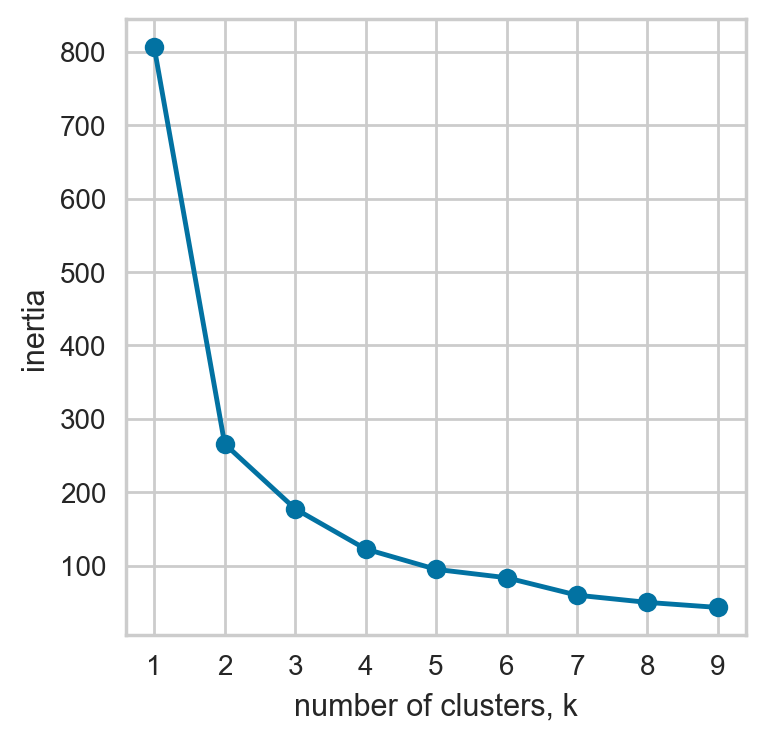

In [138]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_pca)
    inertias.append(model.inertia_)

plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=42),
                 k=(1, 10))

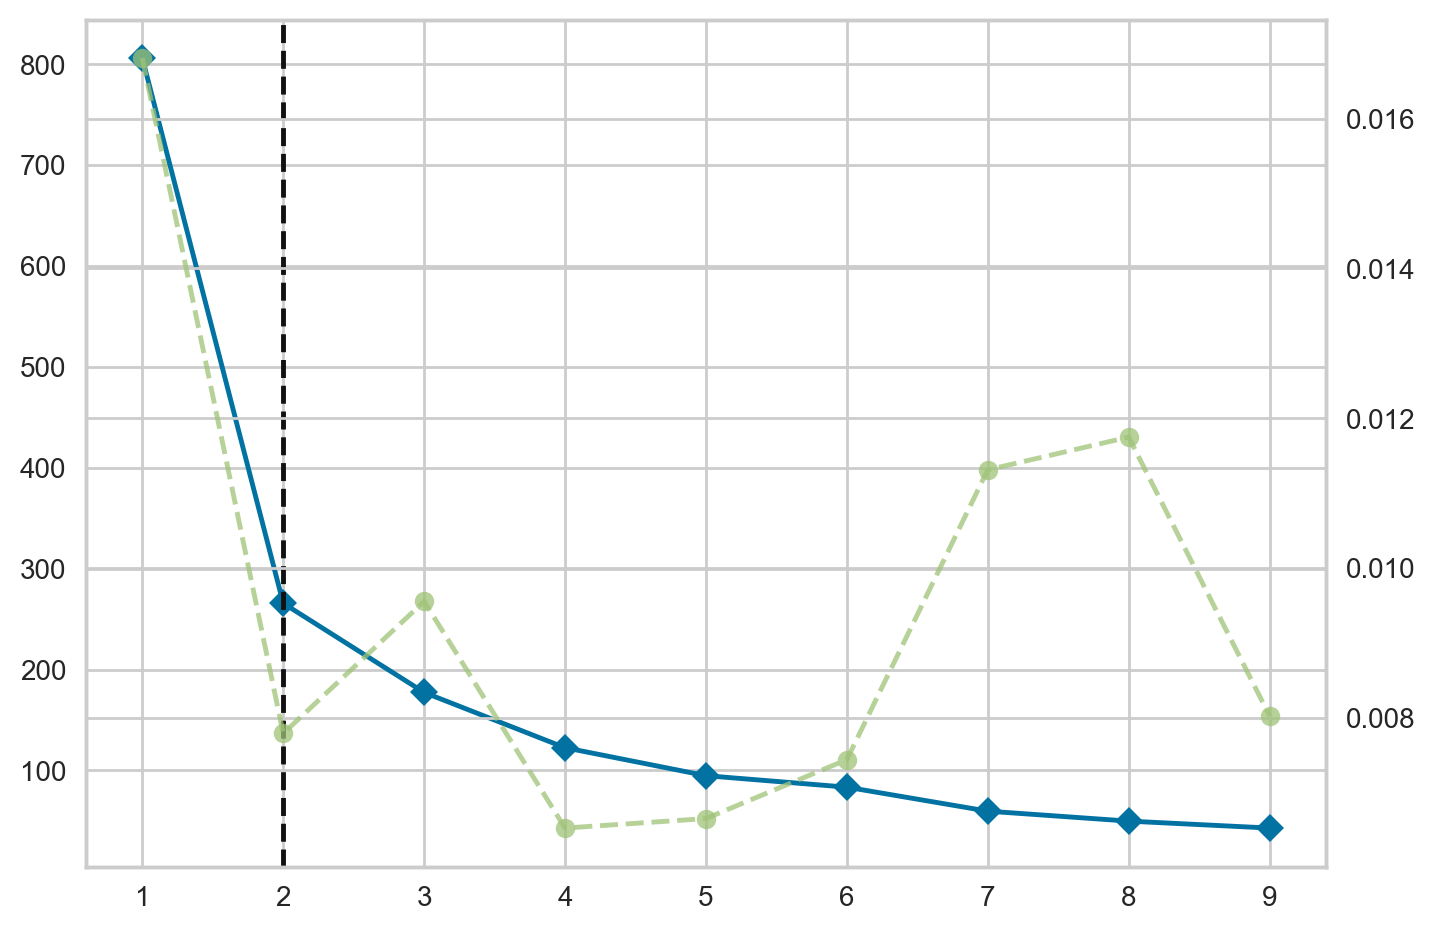

In [139]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df_pca)

#### 모델링

In [148]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_pca)
df_pcav=df_pca.copy()
df_pcav['cluster'] = kmeans.fit_predict(df_pca)

#### 시각화

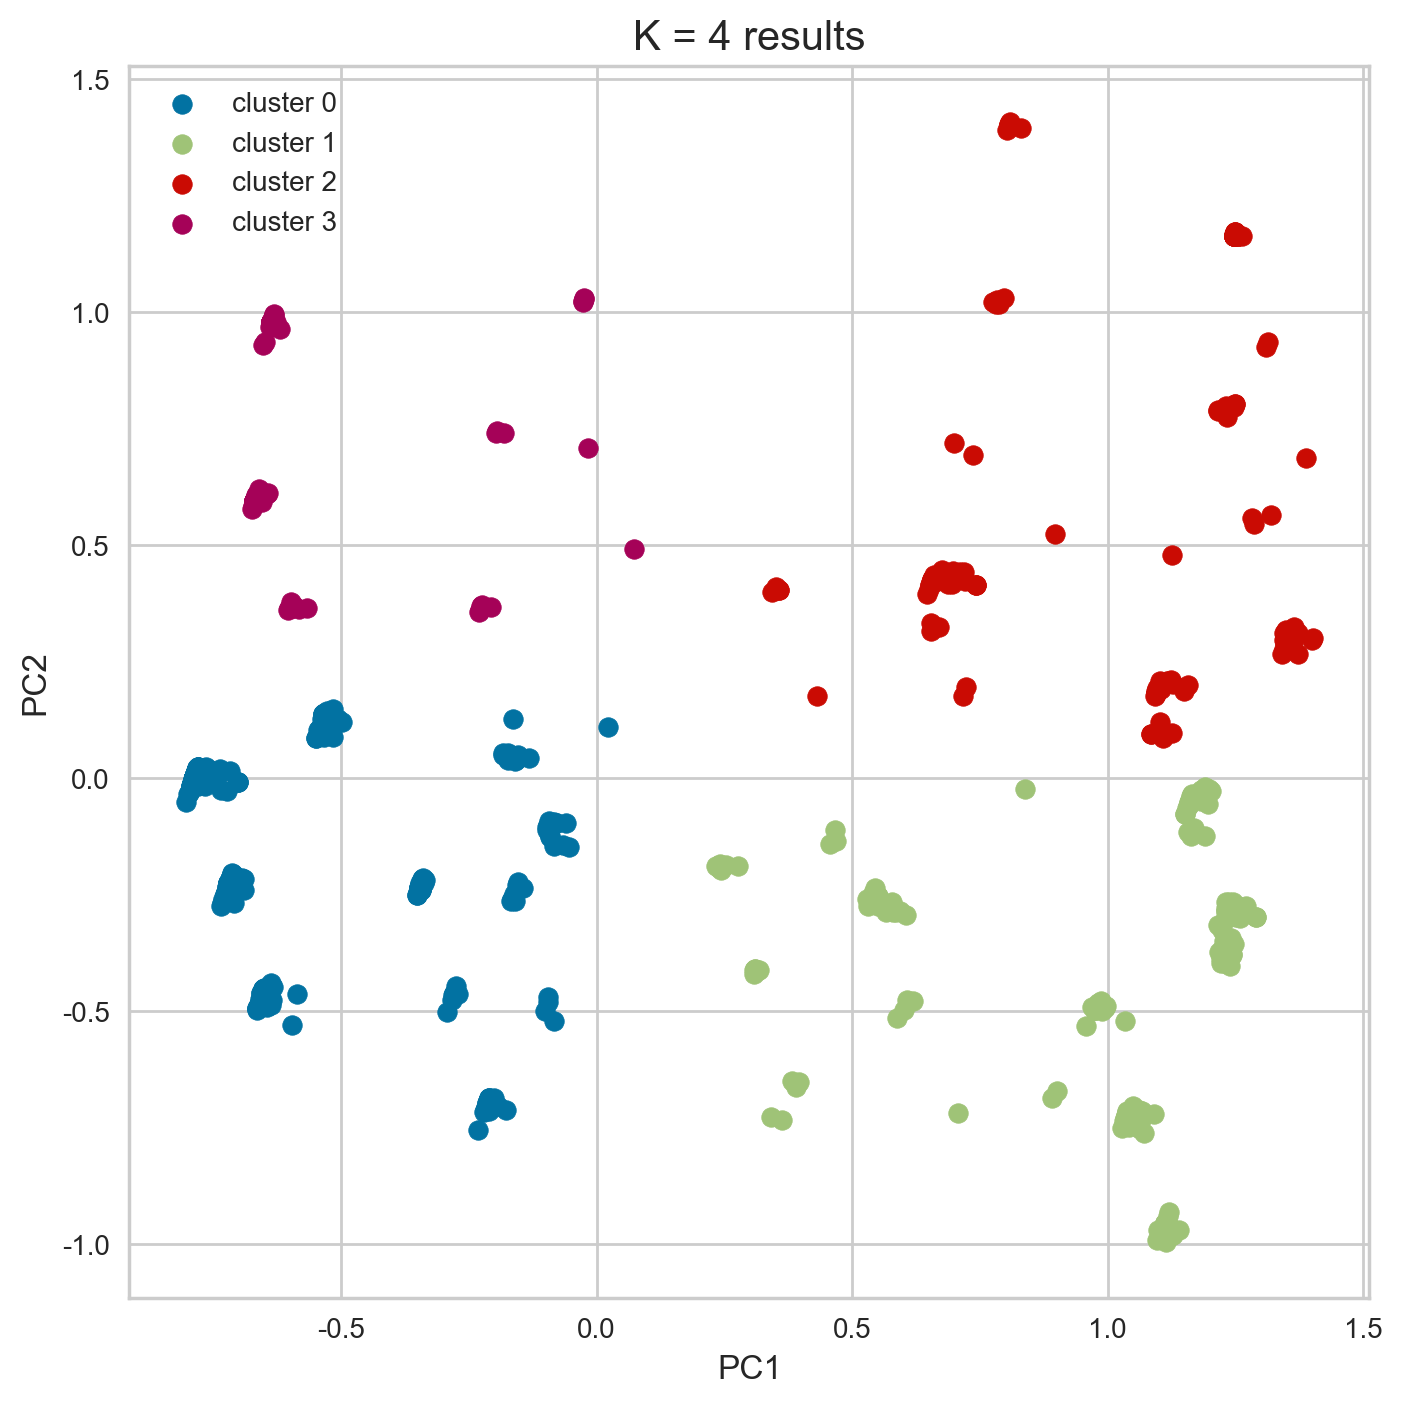

In [149]:
plt.figure(figsize = (8, 8))

k=4

for i in range(k):
    plt.scatter(df_pcav.loc[df_pcav['cluster'] == i, df_pcav.columns[0]], df_pcav.loc[df_pcav['cluster'] == i, df_pcav.columns[1]], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel(f'{df_pcav.columns[0]}', size = 12)
plt.ylabel(f'{df_pcav.columns[1]}', size = 12)
plt.show()